## Merging Datasets

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

app_usage = pd.read_csv('app_usage_cleaned.csv')
detailed_phone_usage = pd.read_csv('detailed_phone_usage_cleaned.csv')
phone_use_data = pd.read_csv('phone_use_data_cleaned.csv')


print(detailed_phone_usage.head())
print(phone_use_data.tail())


        App name        Date  Duration
0  Accessibility  2019-06-01       1.0
1    Adapt sound  2019-05-29       2.0
2         Airtel  2019-05-22       2.0
3         Airtel  2019-05-24       4.0
4         Airtel  2019-05-26       3.0
           Date  Check phone count Screen on time
188  22/05/2019               78.0        7:31:39
189  20/05/2019               34.0        3:17:24
190  19/05/2019               80.0        5:27:18
191  18/05/2019               68.0        4:37:25
192  17/05/2019               33.0        2:51:12


In [18]:


# Convert 'Date' columns to datetime, specifying the format
phone_use_data['Date'] = pd.to_datetime(phone_use_data['Date'], format='%d/%m/%Y')
detailed_phone_usage['Date'] = pd.to_datetime(detailed_phone_usage['Date'], format='%Y-%m-%d')

# Merge the datasets on 'Date' using a left join
merged_df1 = pd.merge(detailed_phone_usage, phone_use_data, on='Date', how='left')

merged_df1 = merged_df1.rename(columns={'Screen on time' : 'Total screen time of all Apps' , 'Check phone count' : 'Check phone count of all Apps'})

merged_df1 = merged_df1.dropna(subset=['Total screen time of all Apps'])


merged_df2 = pd.merge(merged_df1 , app_usage , on = 'App name' , how = 'left')
merged_df2 = merged_df2.rename(columns={'Usage time' : 'App total Usage time' , 'Access count' : 'App total Access count' , 'Average screen time' : 'App total Average Screen time'})

# Save the final merged dataset to a CSV file
merged_df2.to_csv('merged_files.csv', index=False)

# Inspect the merged DataFrame
print(merged_df2.head())


        App name       Date  Duration  Check phone count of all Apps  \
0  Accessibility 2019-06-01       1.0                           73.0   
1    Adapt sound 2019-05-29       2.0                           63.0   
2         Airtel 2019-05-22       2.0                           78.0   
3         Airtel 2019-05-24       4.0                           70.0   
4         Airtel 2019-05-26       3.0                           52.0   

  Total screen time of all Apps App total Usage time  App total Access count  \
0                       5:33:07                  NaN                     NaN   
1                       6:04:37                  NaN                     NaN   
2                       7:31:39              0:50:32                    44.0   
3                       7:44:25              0:50:32                    44.0   
4                       6:55:16              0:50:32                    44.0   

  App total Average Screen time  
0                           NaN  
1                 

In [19]:


merged_df2 = merged_df2.dropna(subset=['App total Usage time'])

# Save the final merged dataset to a CSV file
merged_df2.to_csv('merged_files2.csv', index=False)

# Inspect the merged DataFrame
print(merged_df2.head())


  App name       Date  Duration  Check phone count of all Apps  \
2   Airtel 2019-05-22       2.0                           78.0   
3   Airtel 2019-05-24       4.0                           70.0   
4   Airtel 2019-05-26       3.0                           52.0   
5   Airtel 2019-05-30       1.0                           68.0   
6   Airtel 2019-07-15       7.0                           90.0   

  Total screen time of all Apps App total Usage time  App total Access count  \
2                       7:31:39              0:50:32                    44.0   
3                       7:44:25              0:50:32                    44.0   
4                       6:55:16              0:50:32                    44.0   
5                       8:37:01              0:50:32                    44.0   
6                       7:53:29              0:50:32                    44.0   

  App total Average Screen time  
2                        0:1:08  
3                        0:1:08  
4                   

/tmp/ipykernel_16699/2948644641.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_apps_data, x='App total Access count', y='App name', palette='viridis', order=top_apps)


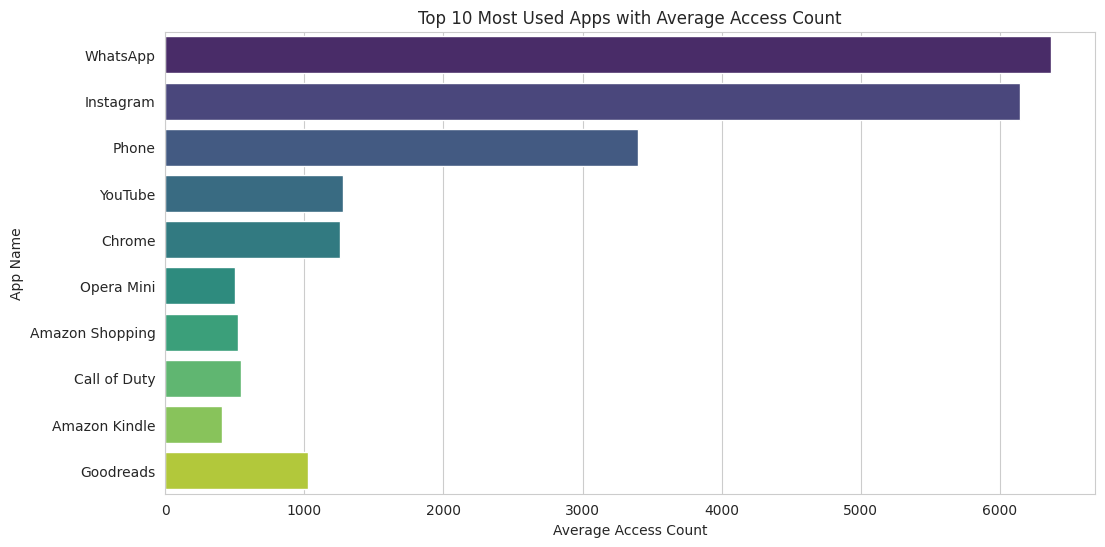

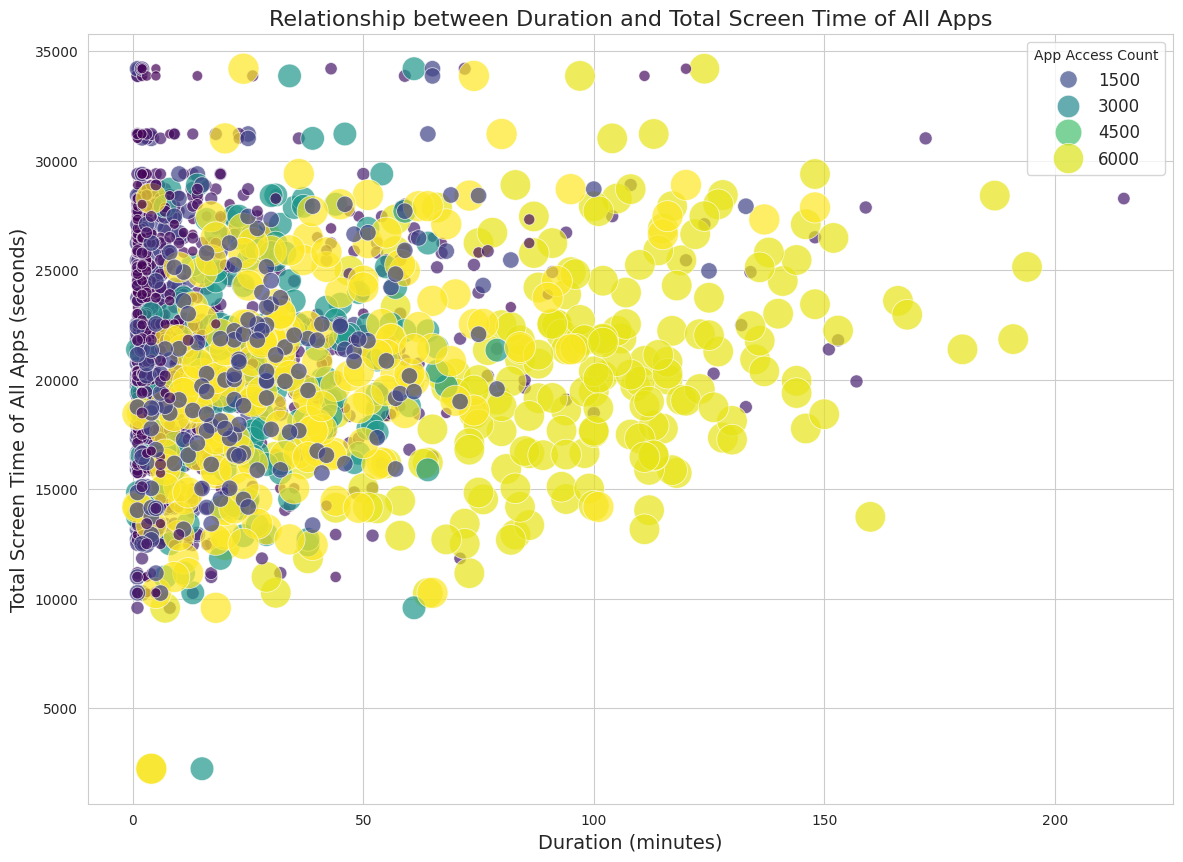

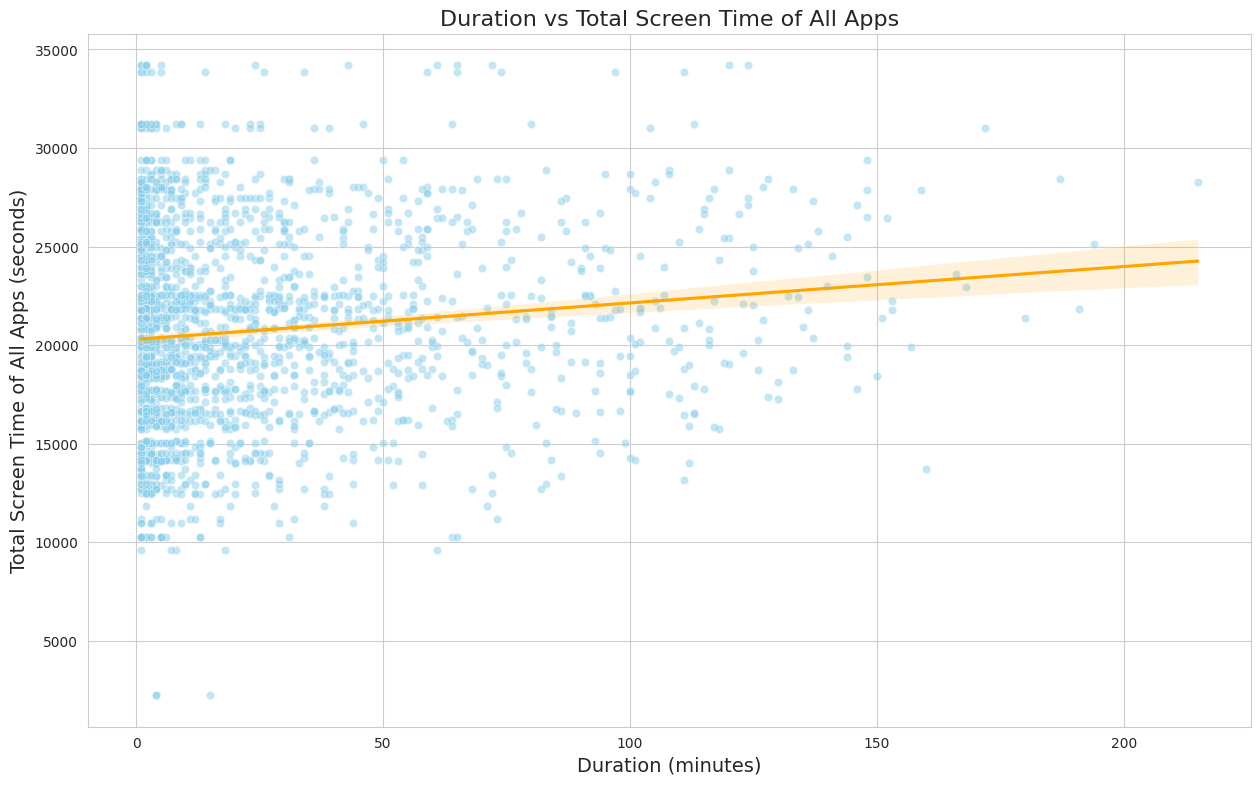

/tmp/ipykernel_16699/2948644641.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(data=generated_dataset, x='App name', y='Duration', palette='pastel')
/tmp/ipykernel_16699/2948644641.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, ha='right')


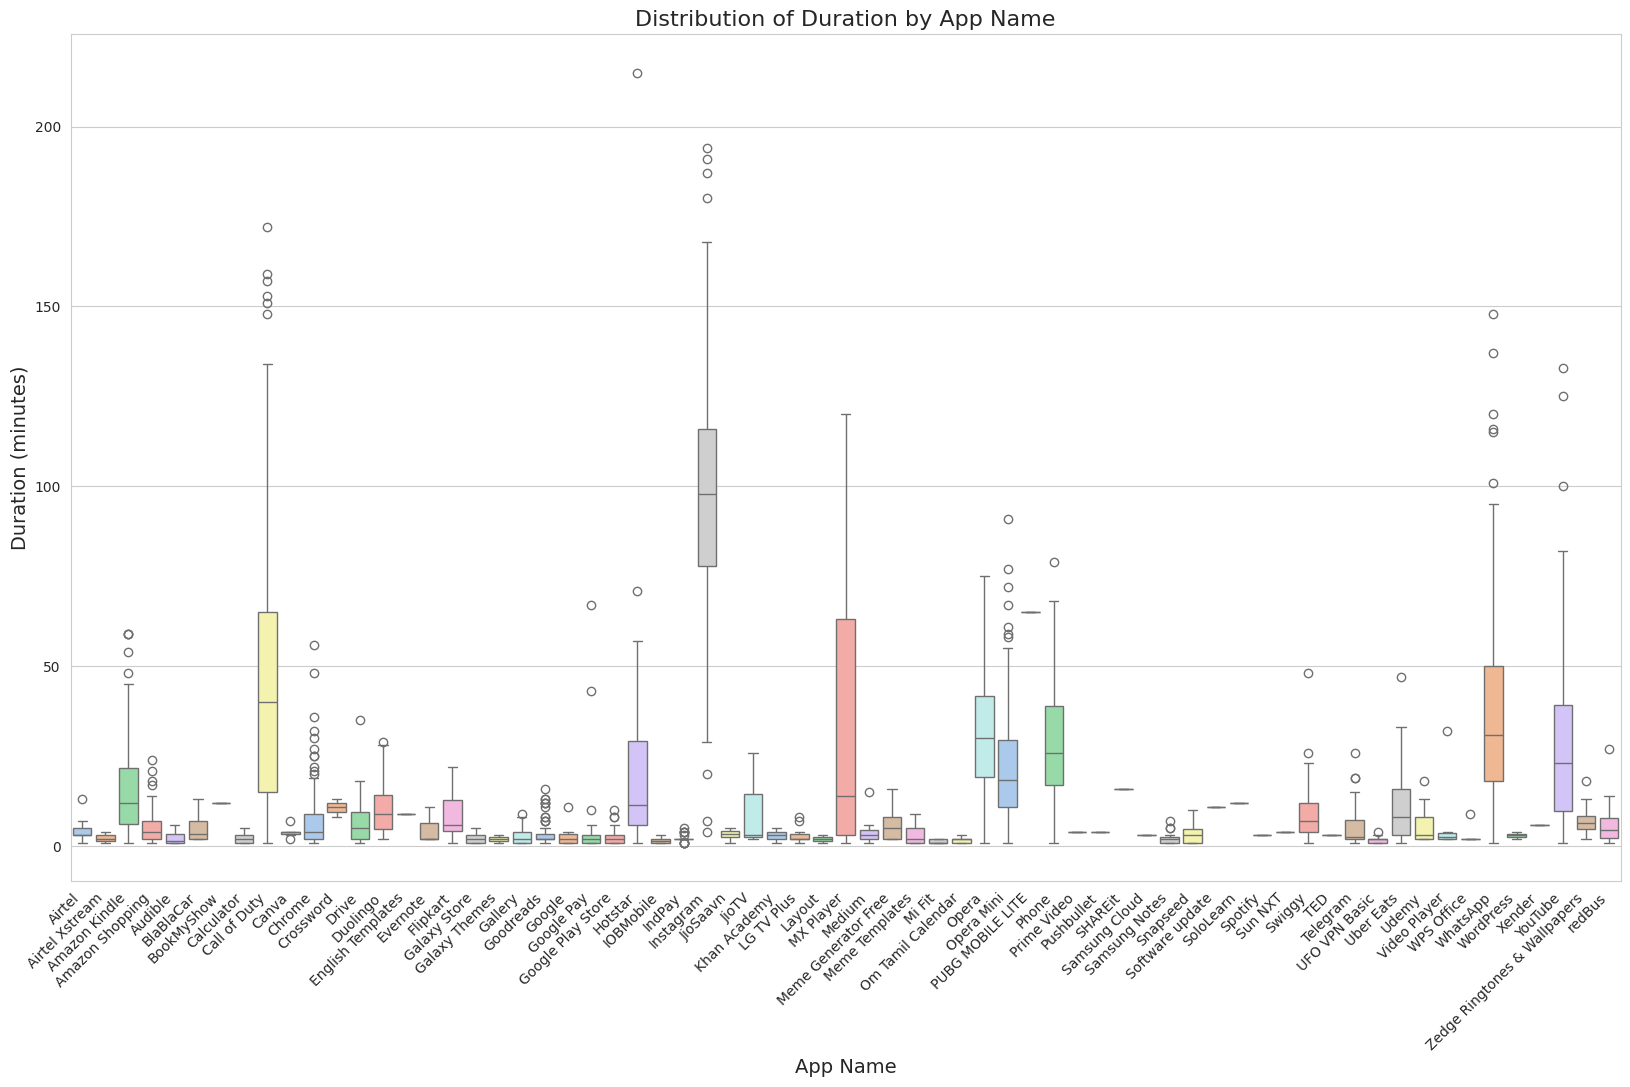

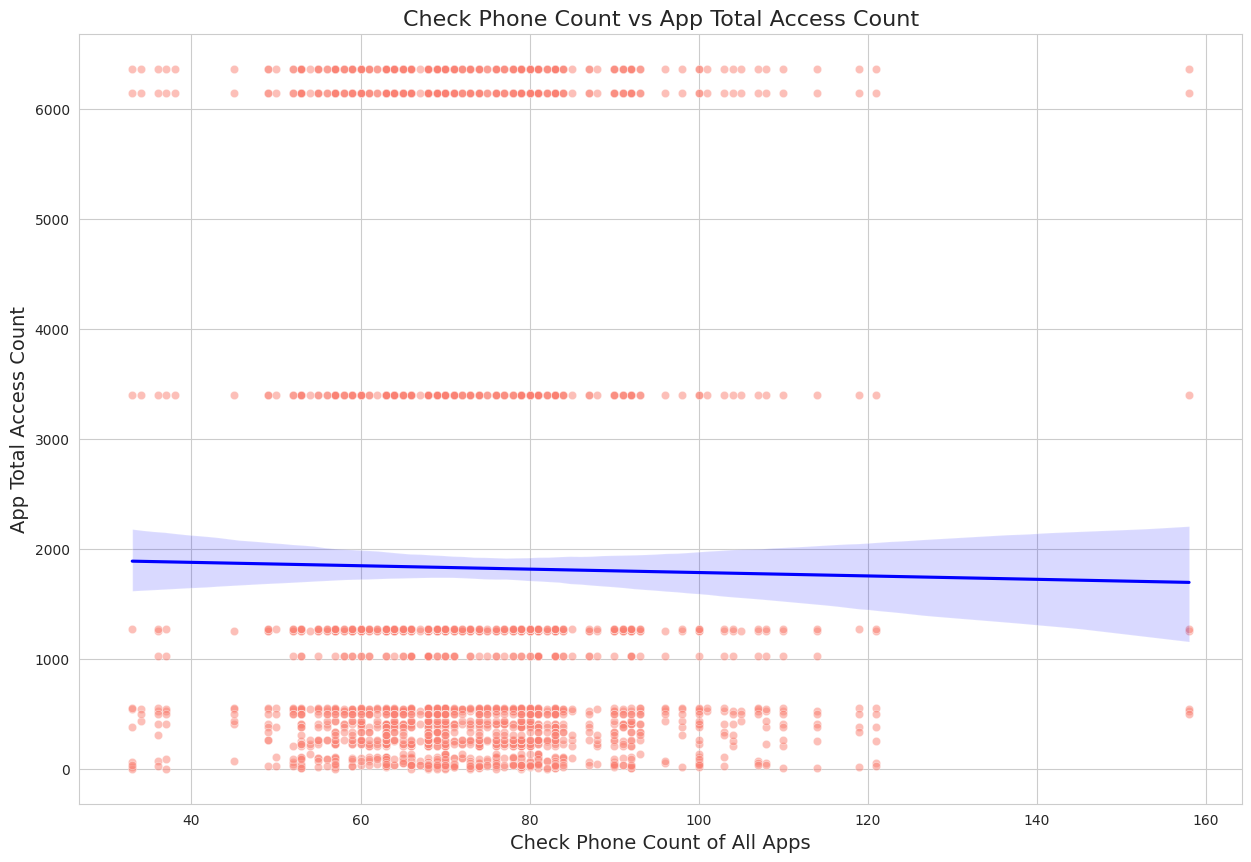

In [20]:
generated_dataset = pd.read_csv('merged_files2.csv')


# top_apps = generated_dataset['App name'].value_counts().head(10)

# plt.figure(figsize=(12, 6))
# sns.barplot(x=top_apps.values, y=top_apps.index, palette='viridis')
# plt.title('Top 10 Most Used Apps')
# plt.xlabel('Frequency')
# plt.ylabel('App Name')
# plt.show()



#First Visual
# Calculate the average access count for each app
avg_access_count_per_app = generated_dataset.groupby('App name')['App total Access count'].mean().reset_index()
top_apps = generated_dataset['App name'].value_counts().head(10).index
top_apps_data = avg_access_count_per_app[avg_access_count_per_app['App name'].isin(top_apps)]

plt.figure(figsize=(12, 6))
sns.barplot(data=top_apps_data, x='App total Access count', y='App name', palette='viridis', order=top_apps)
plt.title('Top 10 Most Used Apps with Average Access Count')
plt.xlabel('Average Access Count')
plt.ylabel('App Name')
plt.show()





#Second Visual
# Convert 'Total screen time of all Apps' from string to total seconds for plotting
def convert_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

generated_dataset['Total screen time of all Apps (seconds)'] = generated_dataset['Total screen time of all Apps'].apply(convert_to_seconds)

# Adjust figure size and style
plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")

# Scatter plot with size and color encoding
scatter = sns.scatterplot(data=generated_dataset, x='Duration', y='Total screen time of all Apps (seconds)', size='App total Access count', sizes=(50, 500), hue='App total Access count', palette='viridis', alpha=0.7)

# Set labels and title
plt.title('Relationship between Duration and Total Screen Time of All Apps', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=14)
plt.ylabel('Total Screen Time of All Apps (seconds)', fontsize=14)

# Add legend with title
plt.legend(title='App Access Count', fontsize=12)

# Show plot
plt.show()







#Third Visual
# Adjust figure size and style
plt.figure(figsize=(15, 9))
sns.set_style("whitegrid")

# Scatter plot with trend line
scatter = sns.scatterplot(data=generated_dataset, x='Duration', y='Total screen time of all Apps (seconds)', alpha=0.5, color='skyblue')
sns.regplot(data=generated_dataset, x='Duration', y='Total screen time of all Apps (seconds)', scatter=False, color='orange')

# Set labels and title
plt.title('Duration vs Total Screen Time of All Apps', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=14)
plt.ylabel('Total Screen Time of All Apps (seconds)', fontsize=14)

# Show plot
plt.show()






#Fourth Visual
# Adjust figure size and style
plt.figure(figsize=(20, 11))
sns.set_style("whitegrid")

# Box plot
boxplot = sns.boxplot(data=generated_dataset, x='App name', y='Duration', palette='pastel')

# Rotate x-axis labels for better readability
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, ha='right')

# Set labels and title
plt.title('Distribution of Duration by App Name', fontsize=16)
plt.xlabel('App Name', fontsize=14)
plt.ylabel('Duration (minutes)', fontsize=14)

# Show plot
plt.show()






#Fifth Visual
# Adjust figure size and style
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")

# Scatter plot with trend line
scatter = sns.scatterplot(data=generated_dataset, x='Check phone count of all Apps', y='App total Access count', alpha=0.5, color='salmon')
sns.regplot(data=generated_dataset, x='Check phone count of all Apps', y='App total Access count', scatter=False, color='blue')

# Set labels and title
plt.title('Check Phone Count vs App Total Access Count', fontsize=16)
plt.xlabel('Check Phone Count of All Apps', fontsize=14)
plt.ylabel('App Total Access Count', fontsize=14)

# Show plot
plt.show()


## Testing and Training Sets

In [21]:

# Load the dataset
sets = pd.read_csv('merged_files2.csv')

# Drop rows with NaN values in the 'Total screen time of all Apps' column
sets.dropna(subset=['Total screen time of all Apps'], inplace=True)

# Convert time to total seconds
sets['Total screen time of all Apps'] = pd.to_timedelta(sets['Total screen time of all Apps'])
hours = sets['Total screen time of all Apps'].dt.components['hours']
minutes = sets['Total screen time of all Apps'].dt.components['minutes']
seconds = sets['Total screen time of all Apps'].dt.components['seconds']
total_seconds = hours * 3600 + minutes * 60 + seconds

# Now create the bins for the 'User Engagement Level' target variable
engagement_levels = pd.cut(total_seconds, bins=3, labels=['Low Engaged', 'Moderately Engaged', 'Highly Engaged'])
sets['User_Engagement_Level'] = engagement_levels

# Save the modified dataset with the added target variable
sets.to_csv('merged_files_with_user_engagement.csv', index=False)


In [22]:
from sklearn.model_selection import train_test_split

# Load the dataset
sets = pd.read_csv('merged_files_with_user_engagement.csv')

# Define features and target
X = sets.drop(columns=['User_Engagement_Level'])  # X contains all columns except the target variable
y = sets['User_Engagement_Level']  # Target variable

# Split the dataset into temporary training (75%) and test (25%) sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Split the temporary training set into training (2/3 of 75%) and validation (1/3 of 75%) sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.3333, random_state=42)

# Print the shapes of the resulting datasets
print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Validation set shape: X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"Test set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")


Training set shape: X_train: (1056, 8), y_train: (1056,)
Validation set shape: X_val: (528, 8), y_val: (528,)
Test set shape: X_test: (528, 8), y_test: (528,)


## Model Training and Hyperparameter Tuning

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np

file_path = "merged_files_with_user_engagement.csv"
df = pd.read_csv(file_path)  

# Convert duration columns to total seconds (assuming 'Duration' is the problematic column)
def convert_to_seconds(duration_str):
    if isinstance(duration_str, str):
        days, time = duration_str.split(' ')
        days = int(days)
        hours, minutes, seconds = map(int, time.split(':'))
        total_seconds = days * 86400 + hours * 3600 + minutes * 60 + seconds
        return total_seconds
    else:
        # Handle missing or non-string values
        return 0  # or np.nan if you prefer to handle missing values differently

# Apply the conversion to all relevant columns
df['Duration'] = df['Duration'].apply(convert_to_seconds)

# Preprocessing
X = df.drop(columns=['App name', 'Date', 'User_Engagement_Level'])
y = df['User_Engagement_Level']

# Convert categorical target variable to numerical
le = LabelEncoder()
y = le.fit_transform(y)

# Convert any remaining object (string) columns to numerical if necessary
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predictions
y_pred = best_rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9054373522458629
              precision    recall  f1-score   support

           0       1.00      0.71      0.83       108
           1       1.00      0.44      0.61        16
           2       0.88      1.00      0.94       299

    accuracy                           0.91       423
   macro avg       0.96      0.72      0.79       423
weighted avg       0.92      0.91      0.90       423



## Game Theory Approach for Hyperparameter Optimization

In [24]:
# Load your dataset
data = "merged_files_with_user_engagement.csv"

# Assuming your dataset is in CSV format, you can load it using pandas
df = pd.read_csv(data)

# Handle missing values (if any)
df.fillna(0, inplace=True)

# Convert categorical features into numerical features
le = LabelEncoder()
df['App name'] = le.fit_transform(df['App name'])
df['User_Engagement_Level'] = le.fit_transform(df['User_Engagement_Level'])

# Function to convert time string to total seconds
def convert_to_seconds(duration_str):
    if isinstance(duration_str, str):
        if 'days' in duration_str:
            days, time = duration_str.split(' days ')
            days = int(days)
        else:
            days = 0
            time = duration_str
        hours, minutes, seconds = map(int, time.split(':'))
        total_seconds = days * 86400 + hours * 3600 + minutes * 60 + seconds
        return total_seconds
    else:
        return 0

# Apply the conversion to all relevant columns
df['Total screen time of all Apps'] = df['Total screen time of all Apps'].apply(convert_to_seconds)
df['App total Usage time'] = df['App total Usage time'].apply(convert_to_seconds)
df['App total Average Screen time'] = df['App total Average Screen time'].apply(convert_to_seconds)

# Features and target variable
X = df.drop(['Date', 'User_Engagement_Level'], axis=1)
y = df['User_Engagement_Level']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define initial hyperparameters
hyperparameters = {
    'n_estimators': 100,
    'max_depth': 10,
    'min_samples_split': 2
}

# Define the range for each hyperparameter
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10]
}

# Function to evaluate the model
def evaluate_model(params):
    model = RandomForestClassifier(n_estimators=params['n_estimators'],
                                   max_depth=params['max_depth'],
                                   min_samples_split=params['min_samples_split'],
                                   random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    return np.mean(scores)

# Iterative optimization inspired by game theory
max_iterations = 10
for iteration in range(max_iterations):
    for param in hyperparameters:
        best_value = None
        best_score = 0
        for value in param_grid[param]:
            temp_params = hyperparameters.copy()
            temp_params[param] = value
            score = evaluate_model(temp_params)
            if score > best_score:
                best_score = score
                best_value = value
        hyperparameters[param] = best_value
        print(f"Iteration {iteration}, Best {param}: {best_value} with score: {best_score}")

# Final model training with optimized hyperparameters
final_model = RandomForestClassifier(**hyperparameters, random_state=42)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

# Evaluate the final model
final_accuracy = accuracy_score(y_test, y_pred)
print(f'Final Model Accuracy: {final_accuracy}')
print(classification_report(y_test, y_pred))


Iteration 0, Best n_estimators: 100 with score: 1.0
Iteration 0, Best max_depth: 10 with score: 1.0
Iteration 0, Best min_samples_split: 2 with score: 1.0
Iteration 1, Best n_estimators: 100 with score: 1.0
Iteration 1, Best max_depth: 10 with score: 1.0
Iteration 1, Best min_samples_split: 2 with score: 1.0
Iteration 2, Best n_estimators: 100 with score: 1.0
Iteration 2, Best max_depth: 10 with score: 1.0
Iteration 2, Best min_samples_split: 2 with score: 1.0
Iteration 3, Best n_estimators: 100 with score: 1.0
Iteration 3, Best max_depth: 10 with score: 1.0
Iteration 3, Best min_samples_split: 2 with score: 1.0
Iteration 4, Best n_estimators: 100 with score: 1.0
Iteration 4, Best max_depth: 10 with score: 1.0
Iteration 4, Best min_samples_split: 2 with score: 1.0
Iteration 5, Best n_estimators: 100 with score: 1.0
Iteration 5, Best max_depth: 10 with score: 1.0
Iteration 5, Best min_samples_split: 2 with score: 1.0
Iteration 6, Best n_estimators: 100 with score: 1.0
Iteration 6, Best 


    Initialization: Start with initial hyperparameters and define the parameter grid.
    Iterative Optimization: Iterate over each hyperparameter, treating it as a player. For each value in its grid, evaluate the model performance and update the hyperparameter to the value that maximizes performance.
    Evaluation: Train the final model using the optimized hyperparameters and evaluate its performance on the test set.